In [1]:
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
Data = pd.read_excel('C:\GitHubRepos\PerennialCrops\Peach\PAR.xlsx')     

In [3]:
for i in Data.index:
    Data.loc[i,'DateTime'] = datetime.datetime.strptime(str(Data.loc[i,'year'])+ ' ' +
                                                        str(Data.loc[i,'day'])+ ' ' +
                                                        str(Data.loc[i,'hhmm']).zfill(4),'%Y %j %H%M')
    if Data.loc[i,'day'] < 172:
        Data.loc[i,'DaysSinceWinterSolstice'] =  Data.loc[i,'day'] + 172
    else:
        Data.loc[i,'DaysSinceWinterSolstice'] = Data.loc[i,'day'] - 172

In [4]:
Data.set_index('DateTime',inplace=True)

In [5]:
Data.drop(columns=['year','day','hhmm','Tlogger','Vbatt'],inplace=True)
Data.where(Data < 3000,other=np.nan,inplace=True)
Data.where(Data > 2,other=np.nan,inplace=True)
Data = Data.loc[:'2011-02-3',:]
Data.loc['2010-01-25':'2010-02-08',:] = np.nan

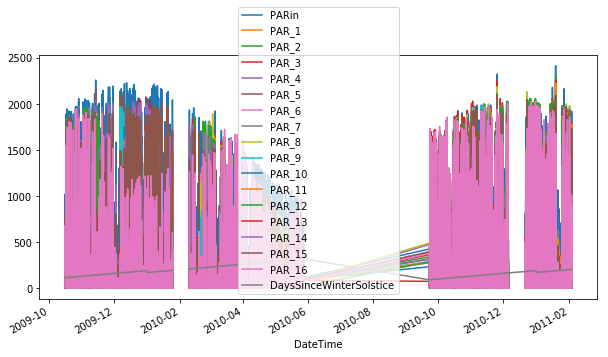

In [6]:
Data.plot(figsize=(10,5))

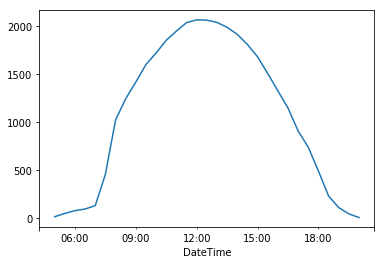

In [7]:
Data.loc['2009-12-24','PARin'].plot()

In [26]:
UnderCanopy = Data.loc[:,'PAR_1':].resample('d').sum().mean(axis=1)
Incident = Data.loc[:,'PARin'].resample('d').sum()
RadInt = 1-(UnderCanopy/Incident)
RadInt.where(RadInt>0,np.nan,inplace=True)
RadInt.name = 'RadInt'
DaySinceWinterSolstice = Data.DaysSinceWinterSolstice.resample('d').mean()

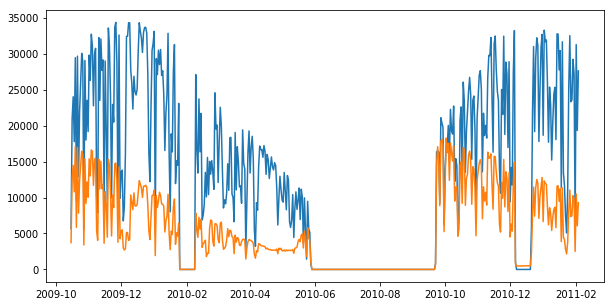

In [27]:
Figure = plt.figure(figsize=(10,5))
Ax = Figure.add_subplot(1,1,1)
plt.plot(Incident)
plt.plot(UnderCanopy)

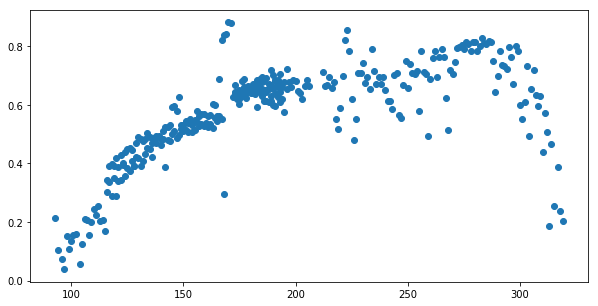

In [28]:
Figure = plt.figure(figsize=(10,5))
Ax = Figure.add_subplot(1,1,1)
plt.plot(DaySinceWinterSolstice,RadInt,'o')


In [29]:
RadIntData = pd.DataFrame(index = RadInt.index, data = DaySinceWinterSolstice,
            columns = ['DaysSinceWinterSolstice'])
RadIntData = RadIntData.join(RadInt)

In [30]:
RadIntData.to_pickle('RadInt.pkl')